#  Supervised Learning Project

## 1. Import all necessary Libraries

In [158]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


## Read the data into the notebook

In [159]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### -The data has 14 columns in total of which 13 are of type INT an 1 is of type FLOAT
#### -There are about 5000 records in this data
#### - It is observed ZIP Code is also of type INT which should be of type String 

### Checking for any null values

In [161]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [162]:
df.isna().apply(pd.value_counts) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


#### No null values has been observed after checking

### We had earlier observed that ZIP Code was of type INT and needs to be changed to type String as it will lead to complications and errors in our calculations. Henceforth changing its datatype to String.
### The education column was also found to be a categorical column. Hence we must change that datatype as well
### We don't need the id column as well.
#### Also the following columns were found to be boolean
* Personal Loan
* Securities Account
* CD Account
* Online
* Credit Card

In [163]:
df['Education'] = df['Education'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('bool')
df['Securities Account'] = df['Securities Account'].astype('bool')
df['CD Account'] = df['CD Account'].astype('bool')
df['Online'] = df['Online'].astype('bool')
df['CreditCard'] = df['CreditCard'].astype('bool')
df.drop('ID', axis=1, inplace=True)




In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null bool
Securities Account    5000 non-null bool
CD Account            5000 non-null bool
Online                5000 non-null bool
CreditCard            5000 non-null bool
dtypes: bool(5), category(1), float64(1), int64(6)
memory usage: 303.0 KB


#### Now the data contains 12 columns of which 5 are of type INT, 5 of type boolean  and 1 each of type Float  and Category.

### Checking for any correlations

In [165]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


##### There seems to be  good correlation between:
* Age and Experience (Very High)
* CCAvg and Income (Moderate)
* Personal Loan and Income (Moderate)

#### FIve point Summary of Data

In [166]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


#### The data looks :
* the average age is 45, min age=23, max=67
* the average experience is 20 years but there is a min experience of -3.0 which is odd
* the average family member is 2
* The average CCAvg is 1.9
* The average Mortgage is 56



### Checking how many records have experience as negative

In [167]:
df[df['Experience']<0].count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

#### There are about 52 records which are reporte negative for Experience . 
#### Since it is only 52 records /5000 we can delete the records

In [168]:
index = df[ df['Experience'] < 0 ].index
df.drop(index , inplace=True)
df[df['Experience']<0].count()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### The records with experience less than 0 has been removed

### The distribution for continous variable 

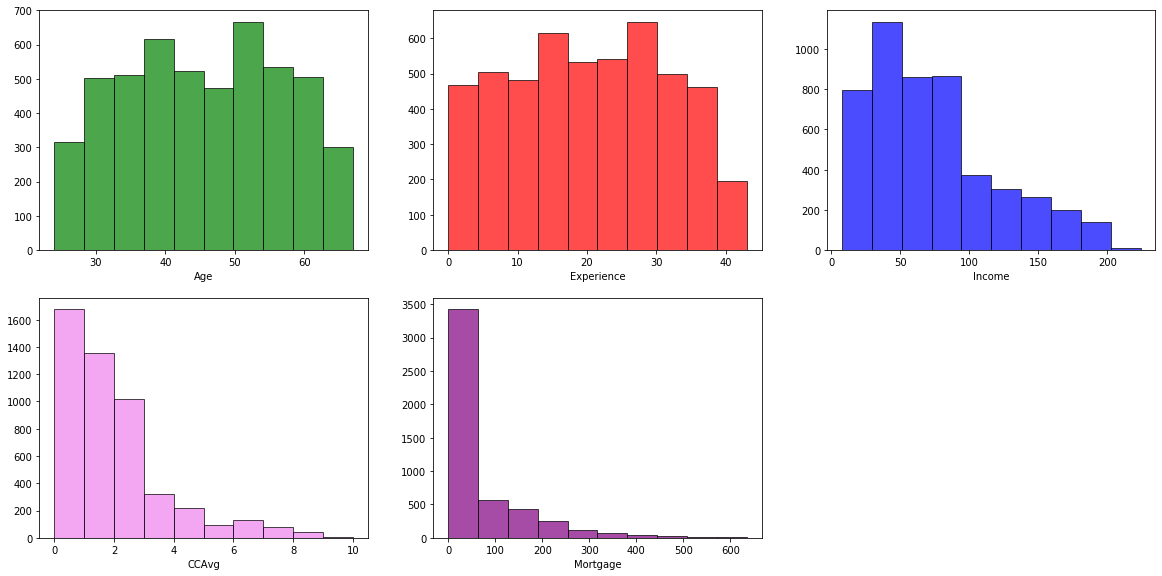

In [169]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.Age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(df.Experience, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(3,3,3)
plt.hist(df.Income, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(3,3,4)
plt.hist(df.CCAvg, color='violet', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')

plt.subplot(3,3,5)
plt.hist(df.Mortgage, color='purple', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')
plt.show()


#### From the graphs it is found out that:
* Most of the people have ages around 40 and 50.
* The people with experience of more than 15-18 adn 25-30 are more in the data.
* The income is skewed to the left side which means it is less overall. The income of 0-100 is more among the people in the data.
* The CCAvg & Mortgage is also found to be left skewed which means more people have very less CCAvg and Mortgage.

### Distribution of Categorical Columns

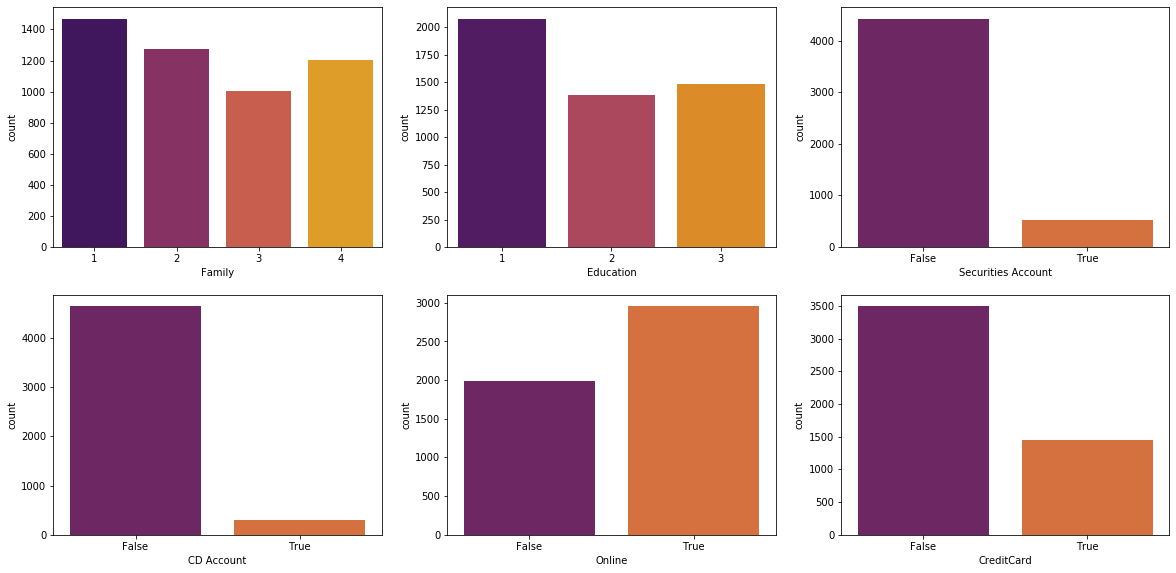

In [170]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot('Family',data=df,palette='inferno')
plt.xlabel('Family')

plt.subplot(3,3,2)
sns.countplot('Education',data=df,palette='inferno')
plt.xlabel('Education')

plt.subplot(3,3,3)
sns.countplot('Securities Account',data=df,palette='inferno')
plt.xlabel('Securities Account')

plt.subplot(3,3,4)          
sns.countplot('CD Account',data=df,palette='inferno')
plt.xlabel('CD Account')

plt.subplot(3,3,5)
sns.countplot('Online',data=df,palette='inferno')
plt.xlabel('Online')

plt.subplot(3,3,6)
sns.countplot('CreditCard',data=df,palette='inferno')
plt.xlabel('CreditCard')   
plt.show()

#### From the distribution of the column we can infer the following:
* The number of families with 1 member an 2 is more than 3 and 4
* The education of level 1 is more which implies most of the people are undergrads.
* The Securities Account & CD Account shows almost 90% is False which means they dont have a Securities Account, CD Account with the bank
* The online column has more True so it shows more people use internet facility of the bank.
* The credit card graph shows there are more people without credit cards than there are with credit cards


### Target Column Distribution

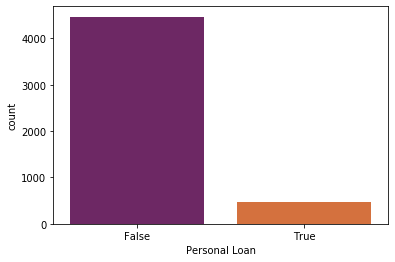

In [171]:
sns.countplot('Personal Loan',data=df,palette='inferno')

#### From the plot we can infer that the number of people who have accepted are very less as compared to those that have rejected it.
* From the previous plots we can infer that the previous campaign was not very successful in getting the customers to apply for personal loans.

# KNN

#### In KNN it is better to scale the numberical values so that one column might not dominate due to its increased values.
### It is better to use only continous variables in KNN algorithm as categorical or boolean might give biased results.

In [172]:
from scipy.stats import zscore
knnData=df.copy()
 # convert all continous attributes to Z scale 
XScaled  = knnData[['Age','Experience','Income','CCAvg','Mortgage']].apply(zscore) 

In [173]:
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(XScaled)
y = np.array(df['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [174]:
print(X_train.shape)
print(X_test.shape)

(3463, 5)
(1485, 5)


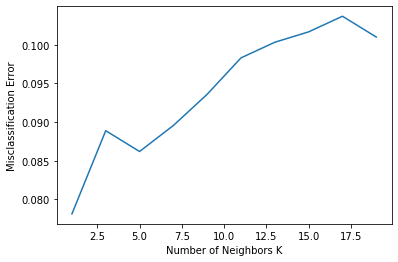

The optimal number of neighbors is 1
The accuracy score for 1 is  0.9218855218855219


In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

knn = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("The accuracy score for %d is " %optimal_k ,accuracy_score(y_test, y_pred))

Confusion Matrix


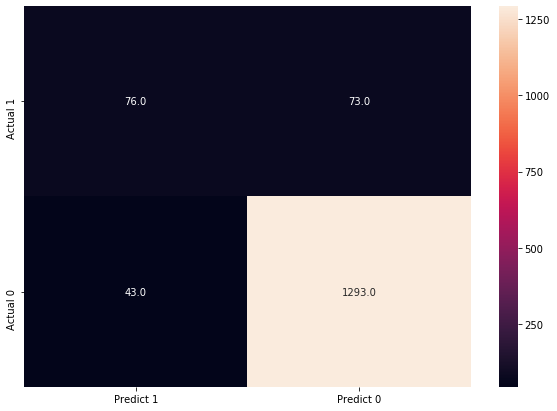

In [176]:
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True , fmt=".1f")


In [177]:
df_cm



,Predict 1,Predict 0
Actual 1,76,73
Actual 0,43,1293


From the above confusion matrix we can observe that the model has predicted 1293 of 1336 of the people who rejecte the loan correctly which is a success rate of 96.7% for loan rejecting customers. And predicted 76 of 149 people who accepted the loan correctly which is a success rate of:51% for loan accepted customers.

## Regression Model

### Splitting the data to test and train 
### Using the logistic regression model to predict the result

In [178]:
# Transform data into features and target

X = np.array(df.drop('Personal Loan', axis=1))
y = np.array(df['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


### Finding the coefficients an intercept of the model

In [179]:
coef_df = pd.DataFrame(model.coef_)
intercept_df=pd.DataFrame(model.intercept_)
print('Coefficients:')
print(coef_df)
print('\nIntercept:')
print(intercept_df)

Coefficients:
         0         1         2         3        4         5        6  \
0  0.00872  0.005798  0.035922 -0.000071  0.01454  0.005725  0.01594   

          7         8         9        10        11  
0  0.000778  0.001253  0.004725 -0.000694 -0.000427  

Intercept:
          0
0 -0.000071


#### Finding the score of the model with the training and testing data

In [180]:
model_score = model.score(X_train, y_train)
print(model_score)

0.9099047069015305


In [181]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9016835016835016


### The regression model shows a good score of 90.99% for the training data and 90.16% for the testing data. This is a good score as the model is not overfitted or underfitted an predicts correctly 90% of the time.
### But let's try by removing the zip code to check the accuracy as my guess is it might hamper the results.

In [182]:
regData=df.copy()

regData.drop('ZIP Code', axis=1, inplace=True)
X = np.array(regData.drop('Personal Loan', axis=1))
y = np.array(regData['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [183]:
coef_df = pd.DataFrame(model.coef_)
intercept_df=pd.DataFrame(model.intercept_)
print('Coefficients:')
print(coef_df)
print('\nIntercept:')
print(intercept_df)

Coefficients:
          0        1         2         3         4         5         6  \
0 -0.392743  0.39552  0.050222  0.631112  0.093383  1.560014  0.000862   

         7        8         9        10  
0 -0.49239  3.36381 -0.716987 -1.098747  

Intercept:
          0
0 -2.324415


In [184]:
model_score = model.score(X_train, y_train)
print(model_score)

0.9509096159399365


In [185]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9501683501683502


### As we can see here the regression model without the ZIP Coe performs better an give about 95.09% in training  and 95.01% accuracy in testing. So removing ZIP Code has been a good option for this model

### Confusion matrix for the regression model

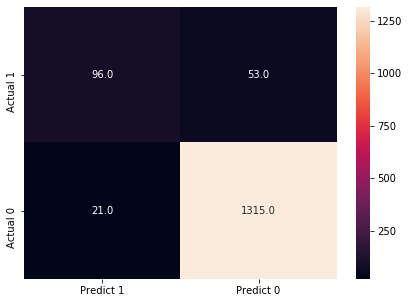

In [186]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_regression = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_regression, annot=True, fmt=".1f")

In [187]:
df_regression

,Predict 1,Predict 0
Actual 1,96,53
Actual 0,21,1315


From the above confusion matrix we can observe that the model has predicted 1315 of 1336 of the people who rejecte the loan correctly which is a success rate of 98% for loan rejecting customers.
And predicted 96 of 149 people who accepted the loan correctly which is a success rate of:64.4% for loan accepted customers

## Naive Bayes

### Splitting the data and fitting the gaussian model

In [188]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# Transform data into features and target
X = np.array(df.drop('Personal Loan', axis=1))
y = np.array(df['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
# create the model
diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

### Checking the model accuracy

In [189]:
diab_train_predict = diab_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy for Training: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy for Training: 0.8859



In [190]:
diab_test_predict = diab_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy for Test: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()



Model Accuracy for Test: 0.8747



#### The model shows a 88.25% accuracy for training set and 87.27% accuracy for testing set which is not bad as it shows the model is not overfitting nor underfitting and gives good accuracy of 87%. 

### Heat Map and Confusion Matrix

Confusion Matrix


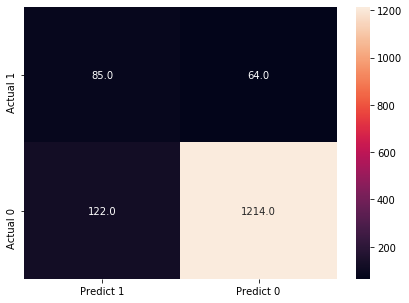

In [191]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_nb = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_nb, annot=True, fmt=".1f")

In [192]:
df_nb

,Predict 1,Predict 0
Actual 1,85,64
Actual 0,122,1214


From the above confusion matrix we can observe that the model has predicted 1211 of 1336 of the people who rejecte the loan correctly which is a success rate of 90.6% for loan rejecting customers. And predicted 85 of 149 people who accepted the loan correctly which is a success rate of:57% for loan accepted customers

### Comparing the confusion matrixes

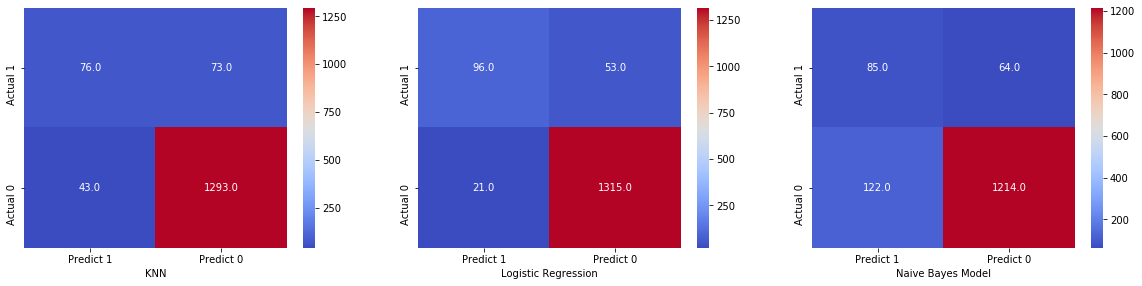

In [193]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.heatmap(df_cm, cmap='coolwarm', annot=True, fmt=".1f")
plt.xlabel('KNN')
plt.subplot(3,3,2)
sns.heatmap(df_regression,cmap='coolwarm', annot=True, fmt=".1f")
plt.xlabel('Logistic Regression')

plt.subplot(3,3,3)
sns.heatmap(df_nb,cmap='coolwarm', annot=True, fmt=".1f")
plt.xlabel('Naive Bayes Model')
plt.show()

From the three models we have seen here . The accuracy of the models are as follows:
##### KNN:
* Customers who rejected Loans: 1293/1336 => 96.7%
* Customers who accepted Loans: 76/149    => 51.0%
* Total accuracy:92.18%
##### Logistic Regression
* Customers who rejected Loans: 1315/1336 => 98.4%
* Customers who accepted Loans: 96/149    => 64.4%
* Total accuracy: 95.01%
##### Naive Bayes
* Customers who rejected Loans: 1214/1336 => 90.8%
* Customers who accepted Loans: 85/149    =>57.0%
* Total accuracy: 87.27%

From the three models the logistric regression has a very high accuracy for loan rejectees and and moderate for loan accepted customers. The KNN and Naive Bayes are almost equal with a difference of 6-7% between them in accepted and rejected customers. All the models have predicted the loan rejectees with more accuracy as the data was biased towards loan rejectees. In that Logistic Regression has the best one of the three teste here. Removing the ZIP Coe played  vital role in increasing the accuracy of the regression model. The Zip Code was hampering the accuracy of the regression model. 

So we check the overall accuracy based on test-data and find that Logistic Regression has a better accuracy overall with 95.01%
So my choice would be to use Logistic Regression in predicting the customer who accepted and rejected personal loans in this data and scenario.

END CHOICE: Logistic Regression

### END OF ASSIGNMENT!